# Company Bankruptcy Prediction

## EDA

### Cel biznesowy
Predykcja brankructwa firm na podstawie parametrów ekonomicznych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

db_data = pd.read_csv('./db/data.csv') 
db_data.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Sprawdzenie wartości null w danych kolumnach

**Wniosek**: brak wratości null

In [54]:
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Sprawdzenie zależności miedzy bankrupctwem a pozostałymi parametrami celem wyszczególenia tych najbardziej istotnych

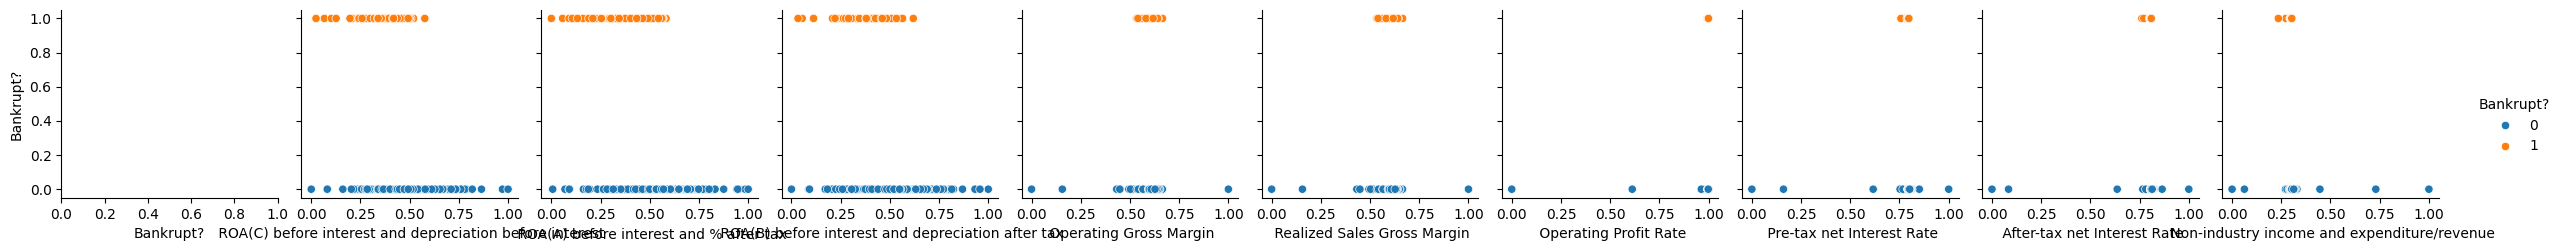

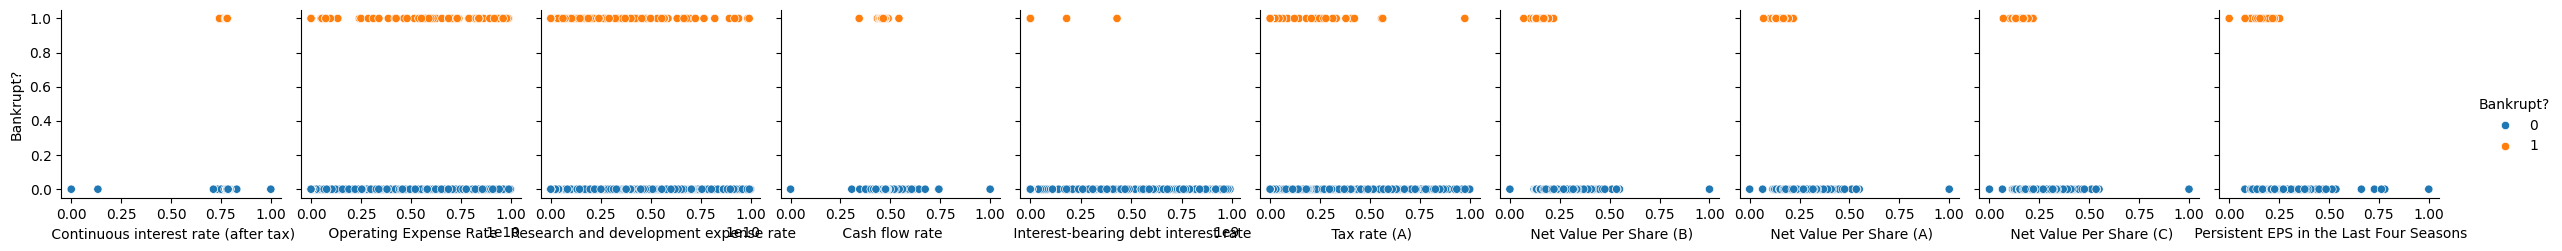

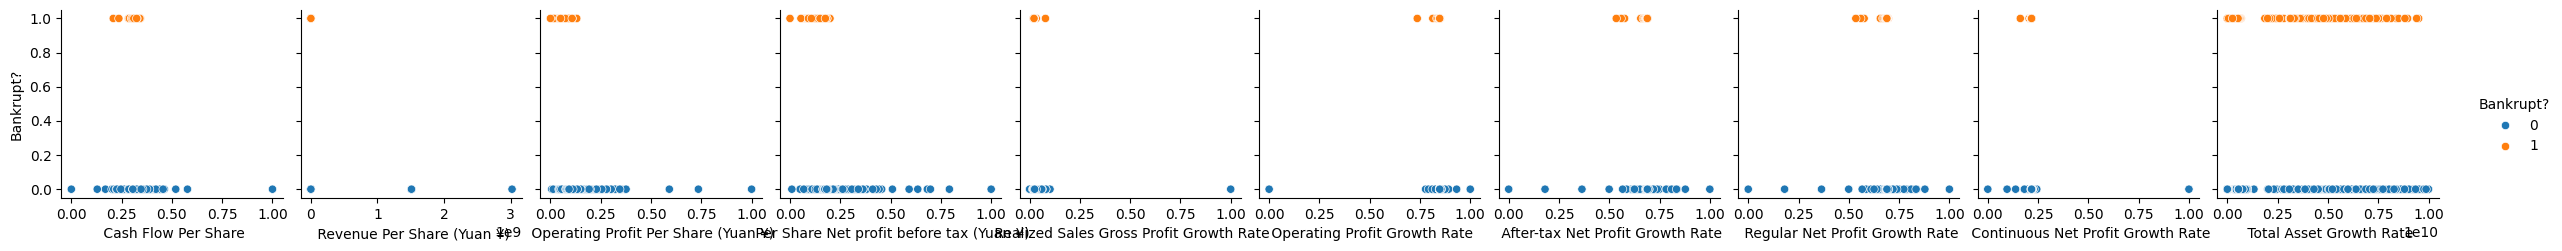

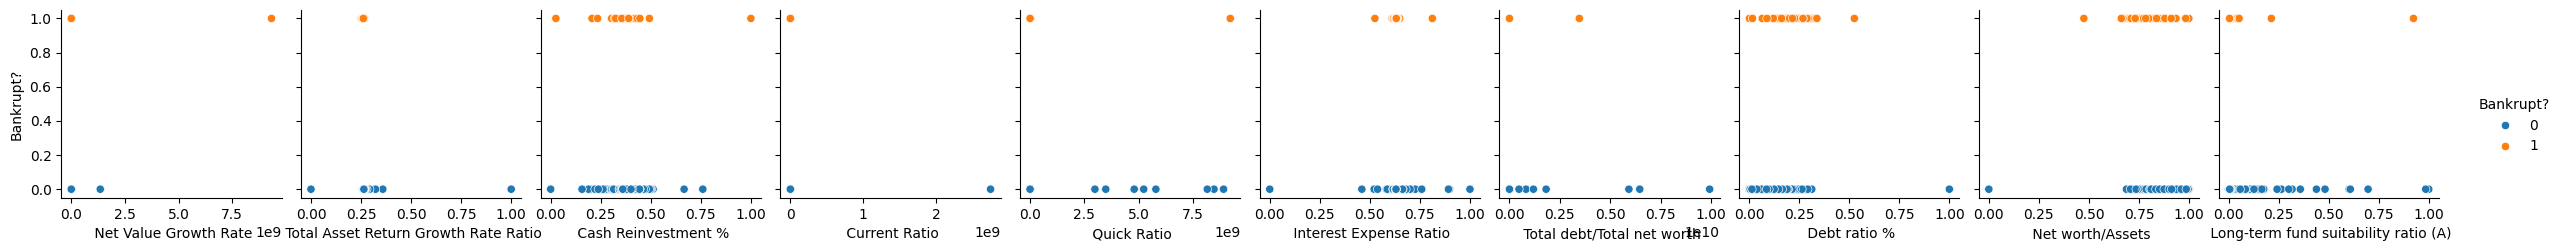

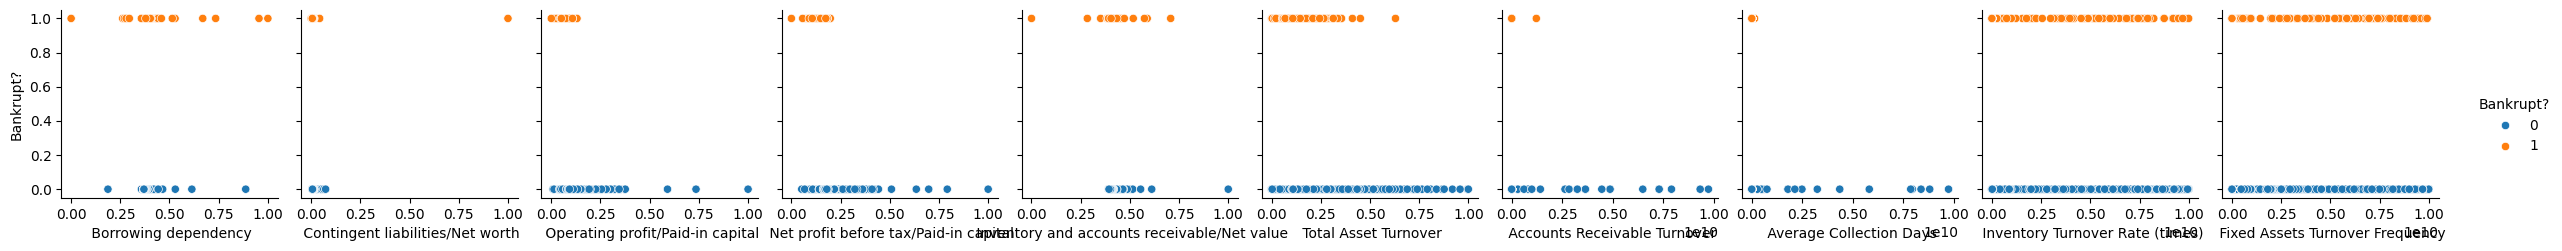

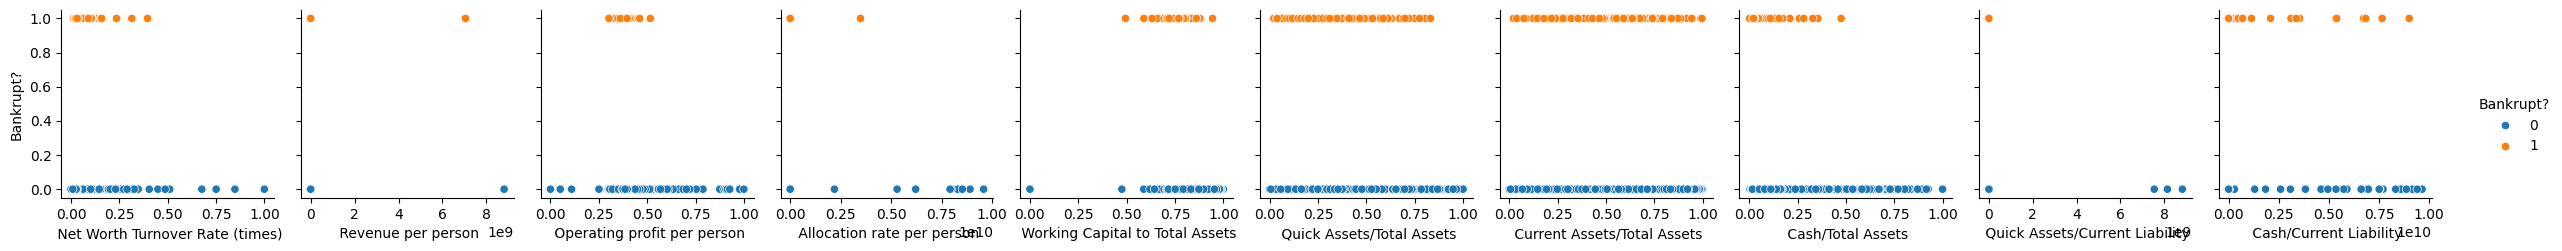

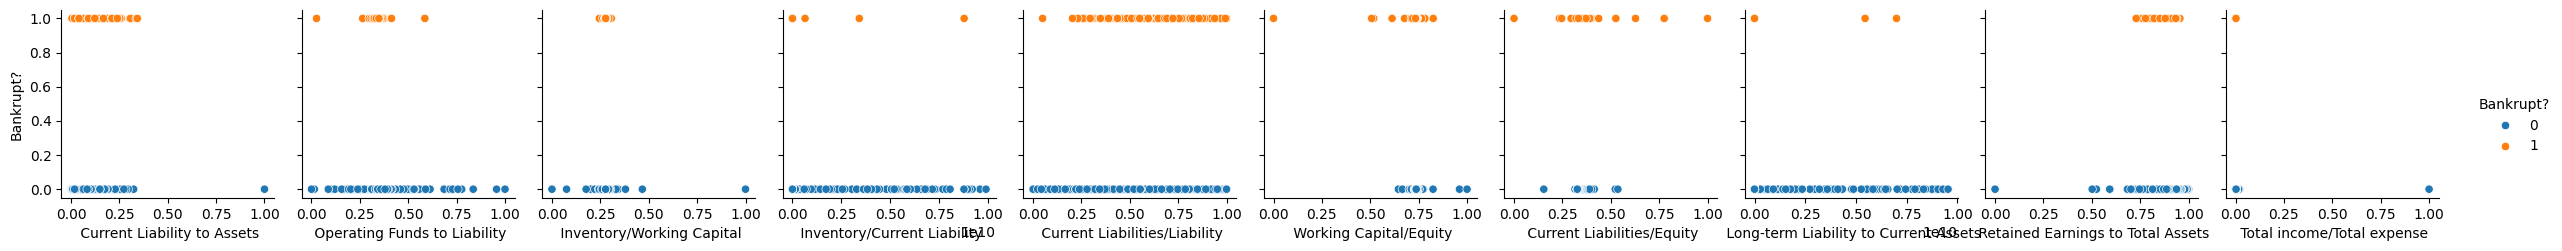

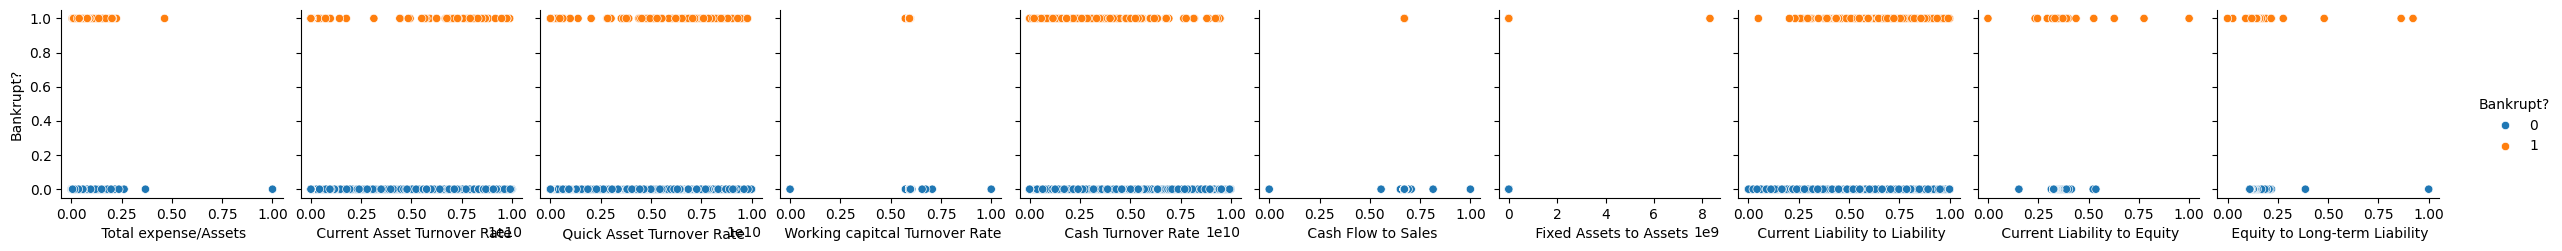

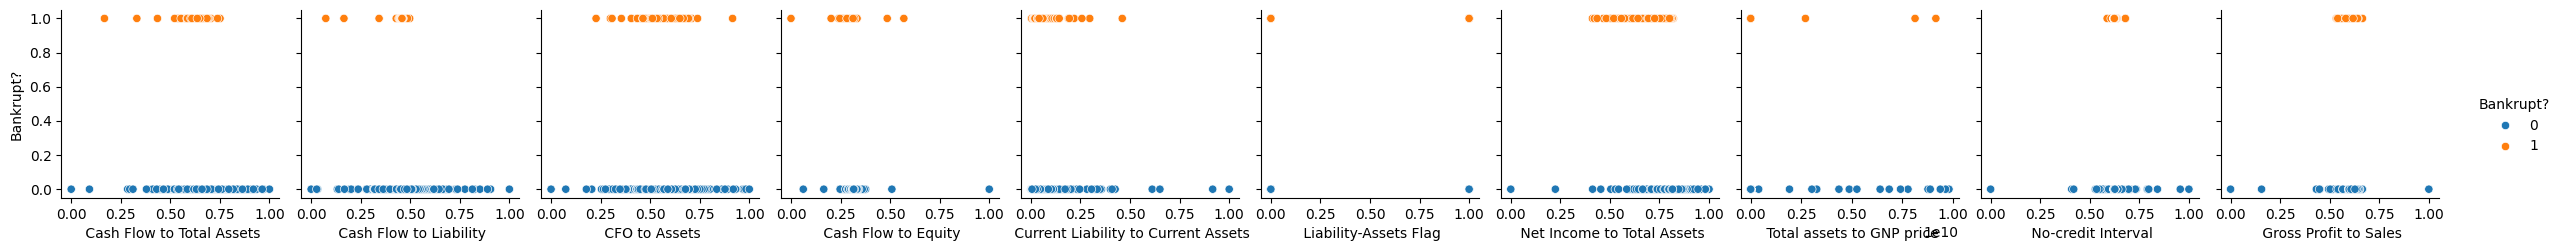

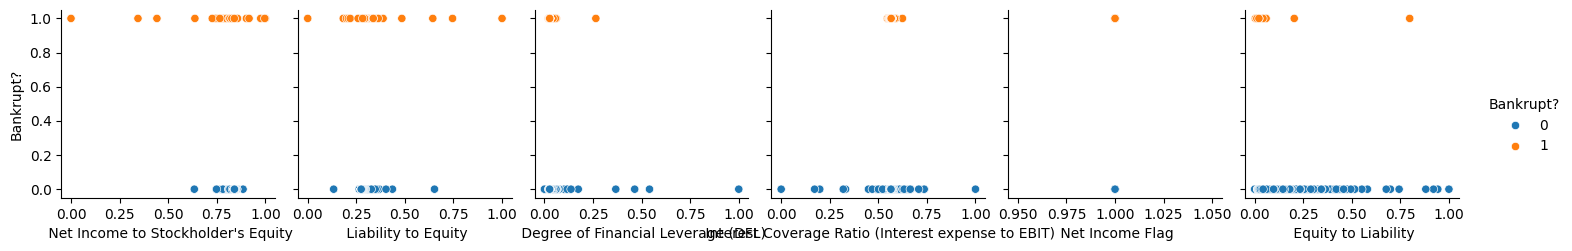

In [60]:
column_values = db_data.columns.values[:100]
for i in range(0, len(column_values), 10):
    sns.pairplot(db_data, y_vars='Bankrupt?', x_vars=column_values[i:i+10], hue='Bankrupt?')
plt.show()

Wybór kolumn z najbardziej widocznymi zależnościami do dalszych badań korelacji

In [61]:
# db_selected = db_data[db_data.columns[[0, 1, 2, 3, 7, 8, 10, 14, 16, 17,18, 19, 21, 22, 23, 30, 33, 34, 36, 39, 40, 42, 43, 45, 46 , 47, 50, 51, 57, 58, 63, 67, 69, 76,78,79, 85,87, 90,92,95]]]
db_selected = db_data[db_data.columns[[0, 3, 39, 40, 42, 43, 45, 57, 95]]]
grouped = db_selected.groupby('Bankrupt?')
db_bankrupt = grouped.get_group(1)
db_not_bankrupt = grouped.get_group(0)

Wizualizacja najbardziej istotnych parametrów za pomocą boxplotów

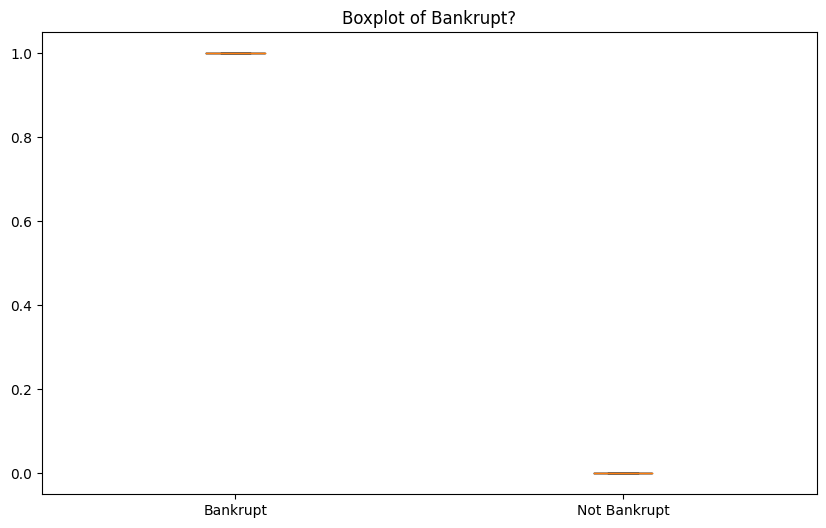

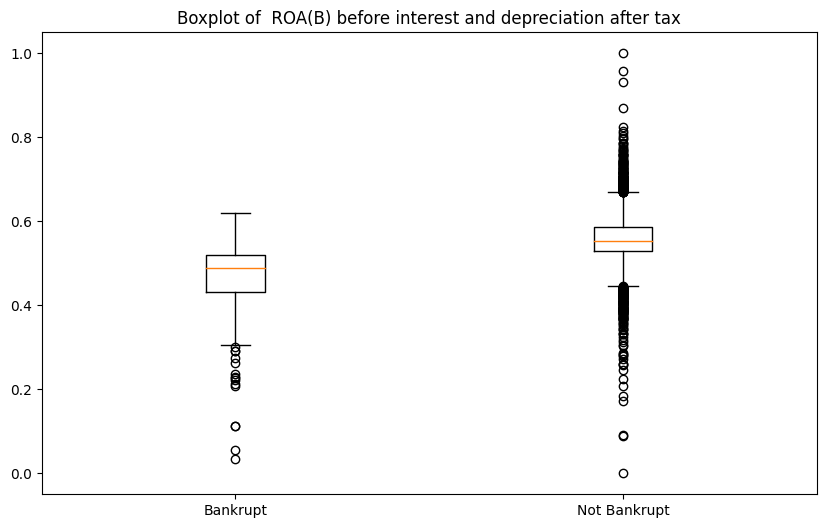

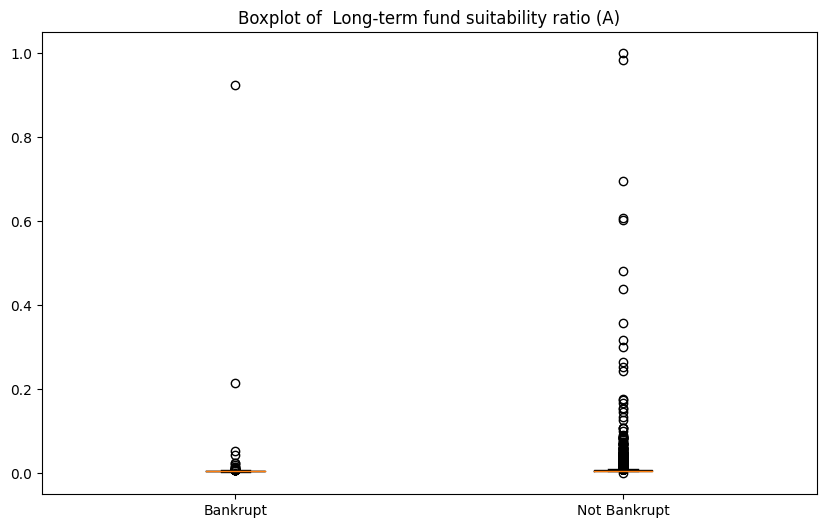

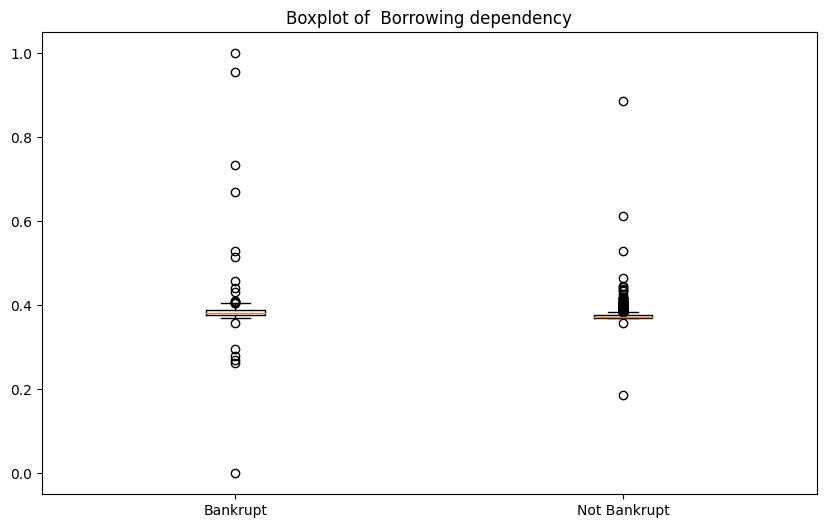

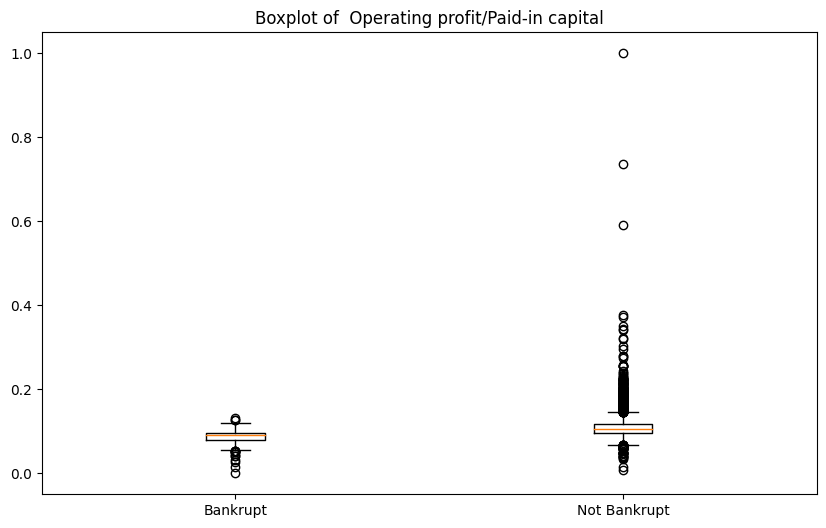

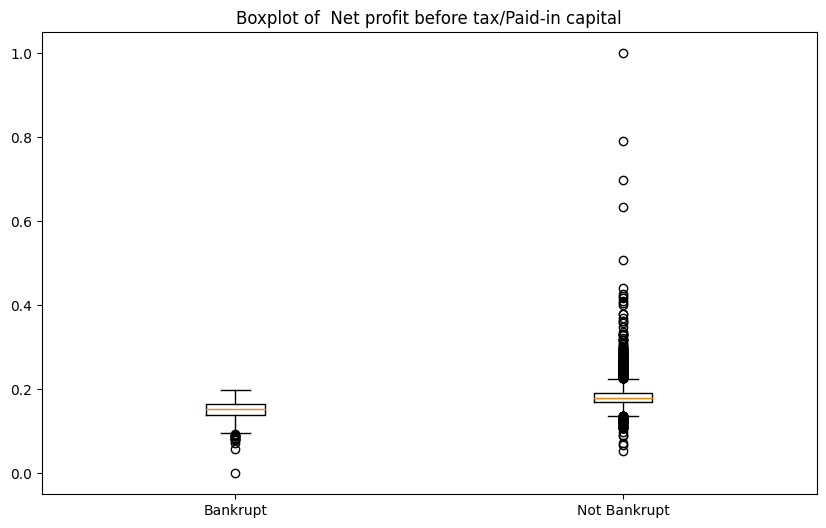

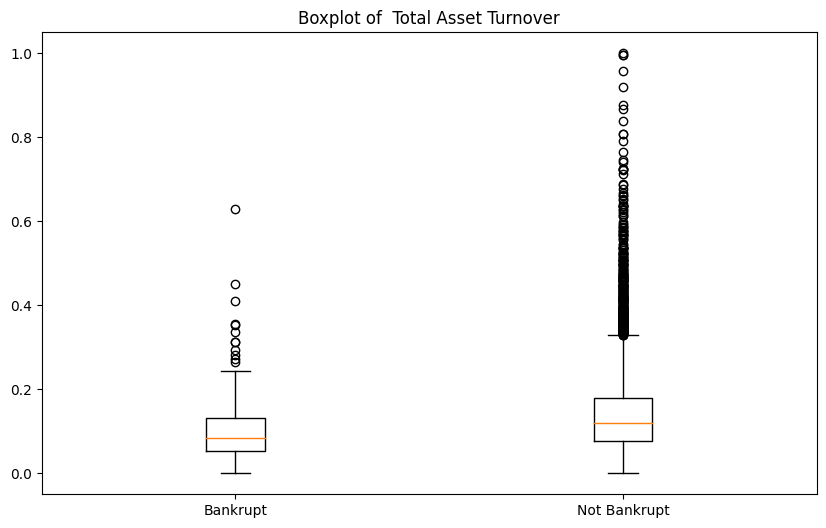

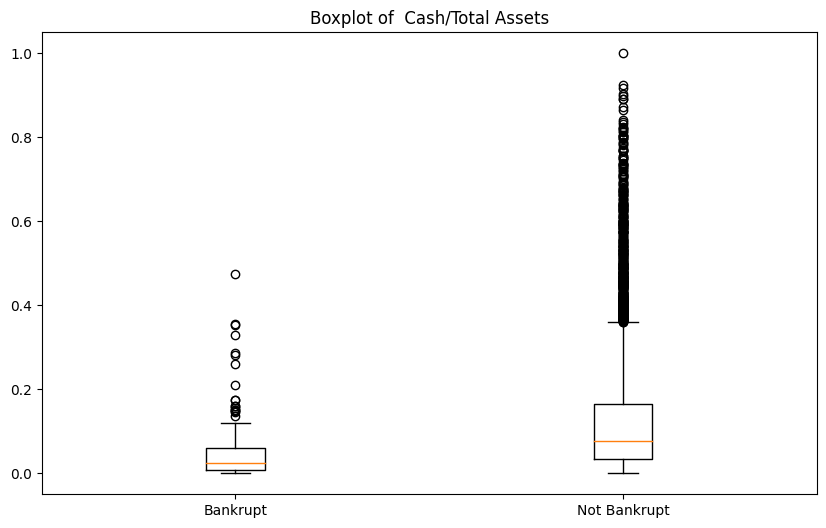

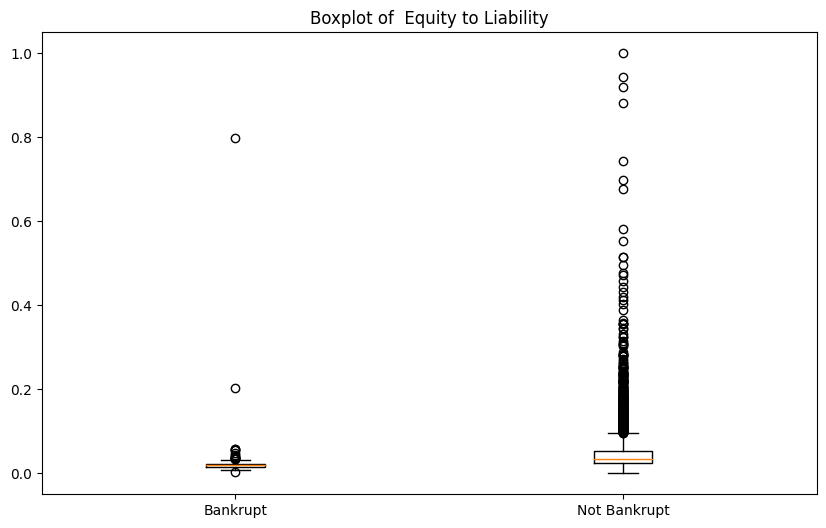

In [58]:
for column in db_bankrupt.columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot([db_bankrupt[column], db_not_bankrupt[column]], labels=['Bankrupt', 'Not Bankrupt'])
    plt.show()

Sprawdzenie zależności pomiędzy wybranymi parametrami

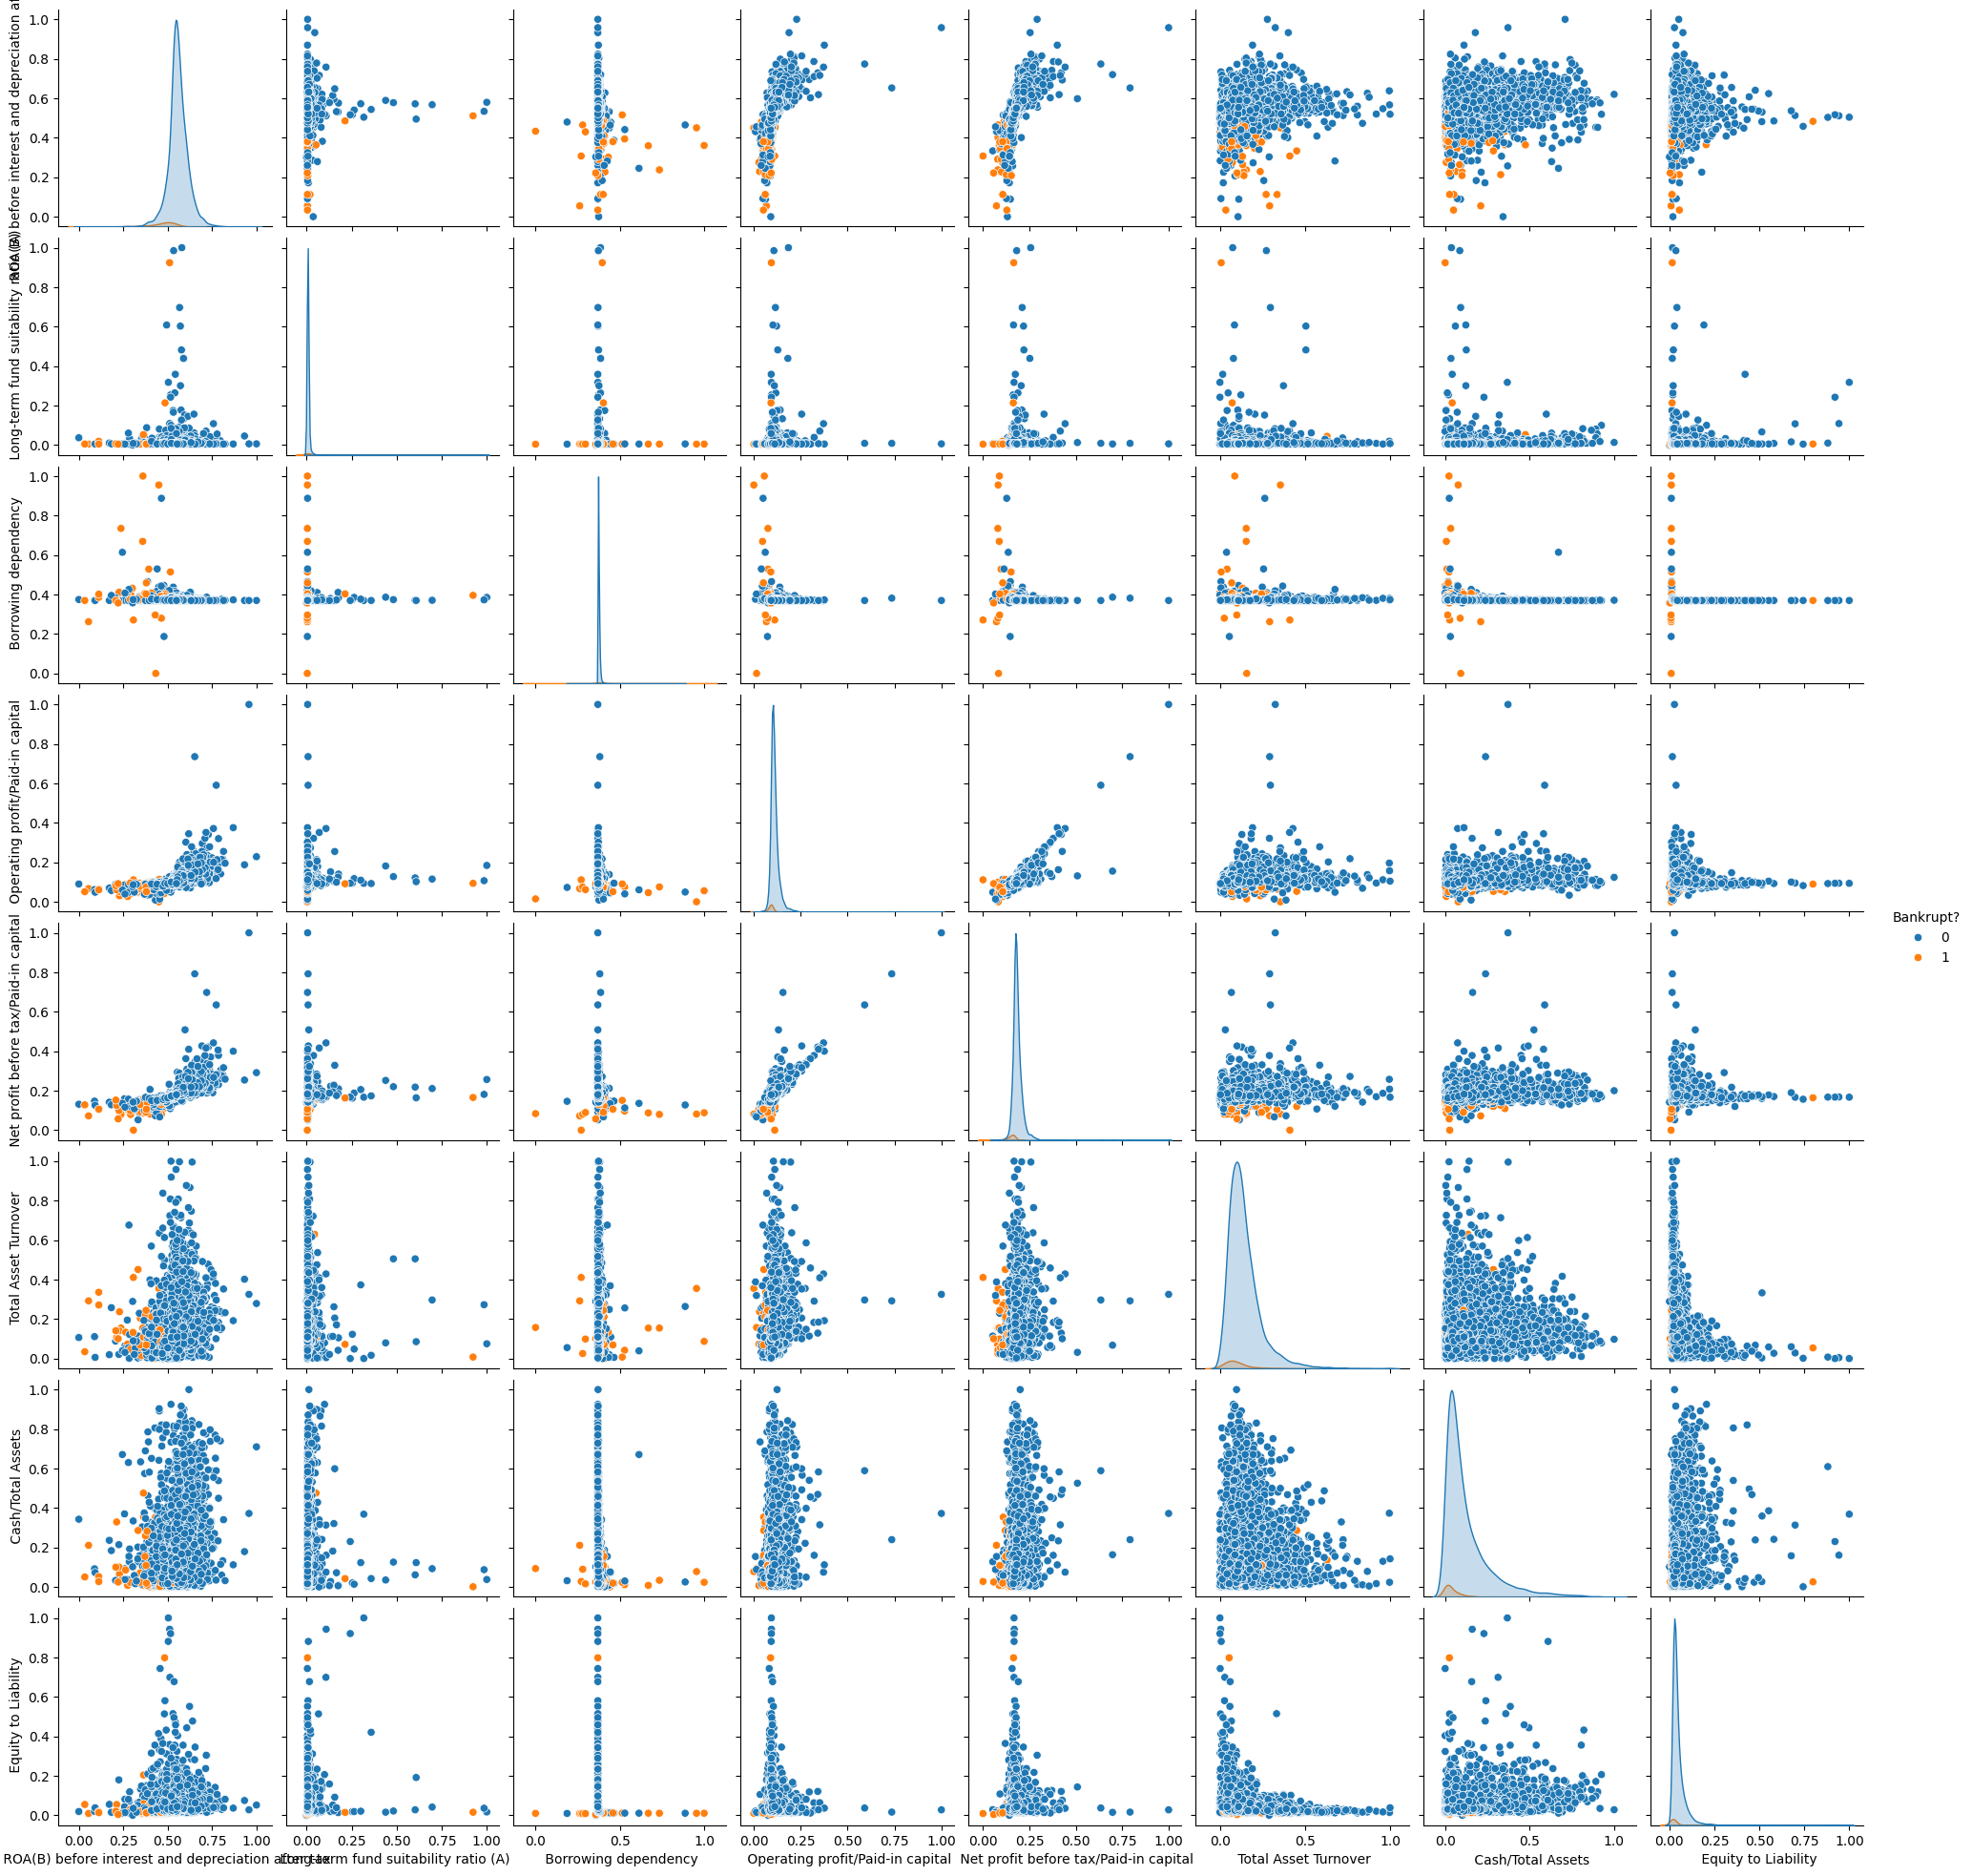

In [62]:
sns.pairplot(db_selected_1, hue='Bankrupt?')

In [ ]:
px.imshow(db_selected_1.loc[db_selected_1["Bankrupt?"]==1].corr(),
          color_continuous_scale = px.colors.sequential.RdBu_r,
          zmin = -1,
          zmax = 1)